In [2]:
# Imports

import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from plotly import __version__
from plotly.offline import iplot
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import string
from nltk import word_tokenize
nltk.download('punkt')
from nltk import punkt
from nlppreprocess import NLP
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from sklearn.feature_selection._univariate_selection import SelectKBest, chi2, f_classif
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to C:\Users\Shayaan
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Shayaan
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Importing the dataset

twt = pd.read_csv('covid19_tweets.csv')

Dataset Exploration and visualization


In [4]:
# A look at a fraction of the dataset
twt.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [5]:
# Shape of the dataset

twt.shape

(179108, 13)

In [6]:
# Information about the dataset

twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [7]:
# Dataset description

twt.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


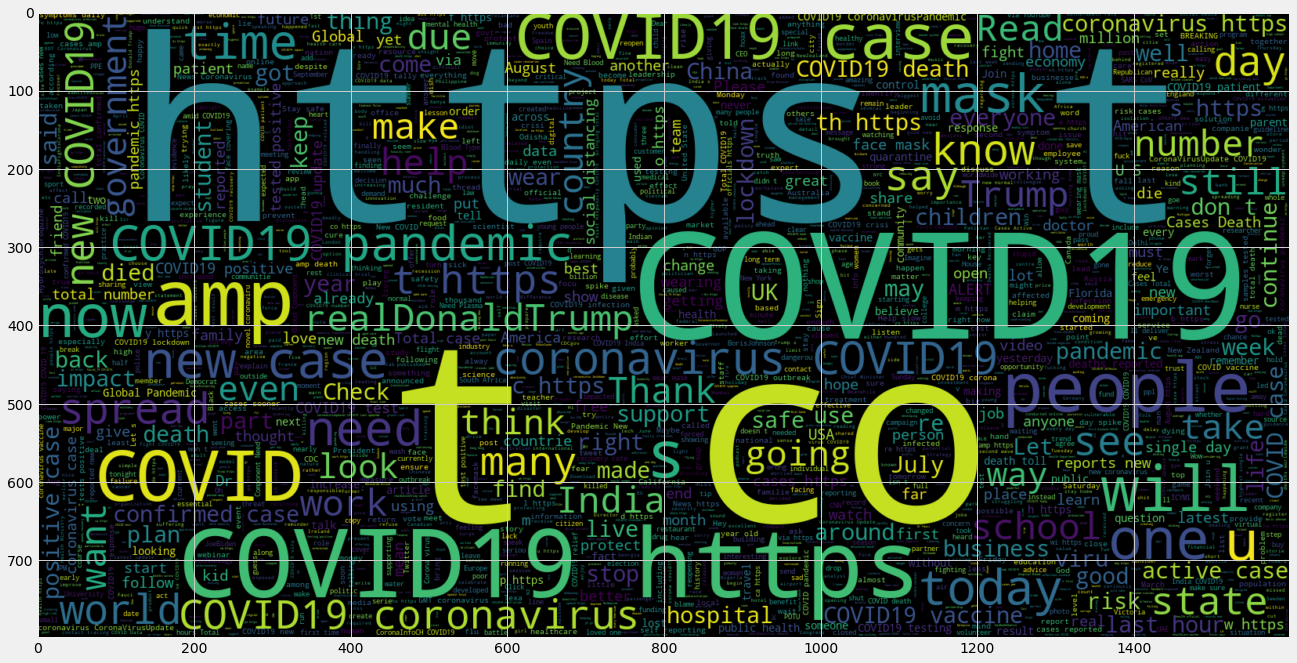

In [8]:
# Word cloud of the tweets before any pre-processing

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(twt.text))
plt.imshow(wc , interpolation = 'bilinear')

In [9]:
# Missing values in the form of percentages

for var in twt.columns:
    if twt[var].isna().sum() > 0:
        miss = np.round(twt[var].isna().sum() / twt.shape[0] * 100 , 3)
        print(var, "has {0} % of missing values".format(miss))

user_location has 20.53 % of missing values
user_description has 5.743 % of missing values
hashtags has 28.661 % of missing values
source has 0.043 % of missing values


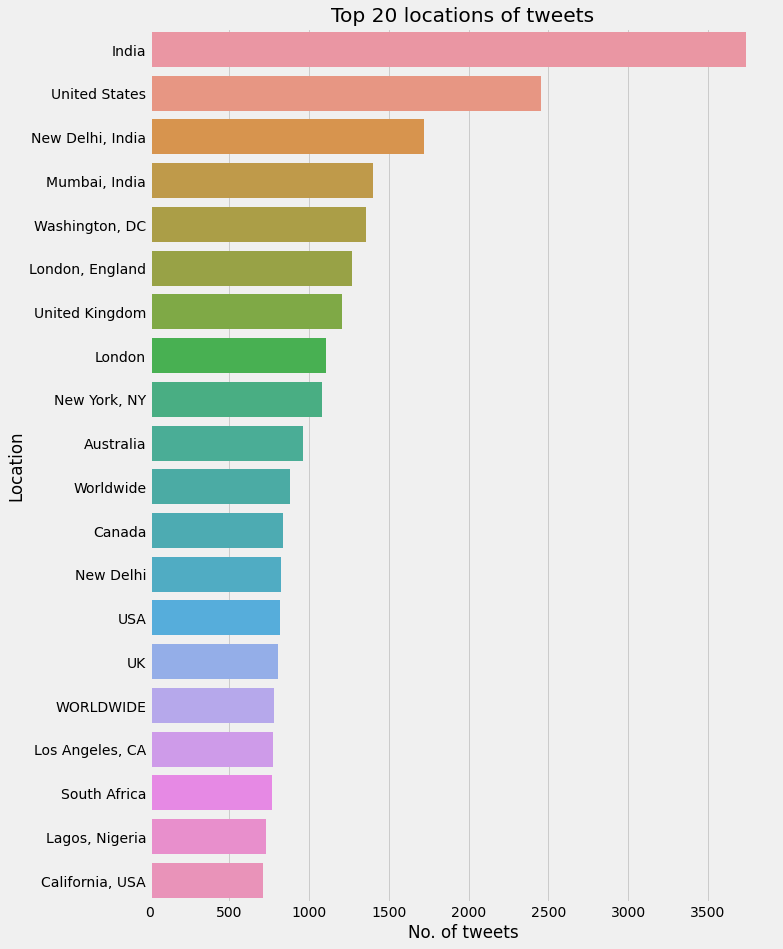

In [10]:
# Plotting the location of tweets in the form of a Bargraph

plt.figure(figsize=(10,15))
sns.barplot(twt["user_location"].value_counts().values[0:20] , twt["user_location"].value_counts().index[0:20])
plt.title("Top 20 locations of tweets")
plt.xlabel("No. of tweets")
plt.ylabel("Location")
plt.show()

In [11]:
# Only certain columns are needed for the project

req_cols = ['user_name' , 'user_location' , 'date' , 'text']
twt = twt[req_cols]
twt.head()

,user_name,user_location,date,text
0,ᏉᎥ☻լꂅϮ,astroworld,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


In [12]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [13]:
# Function to pre-process the tweets
# Pre-processing involves removal of links, punctuations, words containing numbers, text in square brackets as well as converting all the text to lower case. Stemming has also been implemented

def preprocess(text, stem=True):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [14]:
twt.text = twt.text.apply(lambda x: preprocess(x))

In [15]:
twt.head()

,user_name,user_location,date,text
0,ᏉᎥ☻լꂅϮ,astroworld,2020-07-25 12:27:21,smell scent hand sanit today someon past would...
1,Tom Basile 🇺🇸,"New York, NY",2020-07-25 12:27:17,hey yanke yankeespr mlb made sens player pay r...
2,Time4fisticuffs,"Pewee Valley, KY",2020-07-25 12:27:14,wdunlap realdonaldtrump trump never claim covi...
3,ethel mertz,Stuck in the Middle,2020-07-25 12:27:10,one gift covid19 give appreci simpl thing alwa...
4,DIPR-J&K,Jammu and Kashmir,2020-07-25 12:27:08,25 juli media bulletin novel coronavirusupd co...


In [16]:
# Sentiment is assigned to each tweet using SentimentIntensityAnalyzer from VADER

sia = SentimentIntensityAnalyzer()

# This function assignes sentiments
def scorer(text):
    dict_res = sia.polarity_scores(text)
    return dict_res["compound"]

# This function changes the score values such that tweets are sorted into only 3 categories, 1 if positive, 0 if neutral 
# and -1 if negative
def sentiment_sorter(score):
    if score > 0.25:
        score = 1
    else: 
        if score < -0.25:
            score = -1
        else:
            score = 0
    return score



In [17]:
twt["score"] = twt["text"].apply(lambda x: scorer(x))

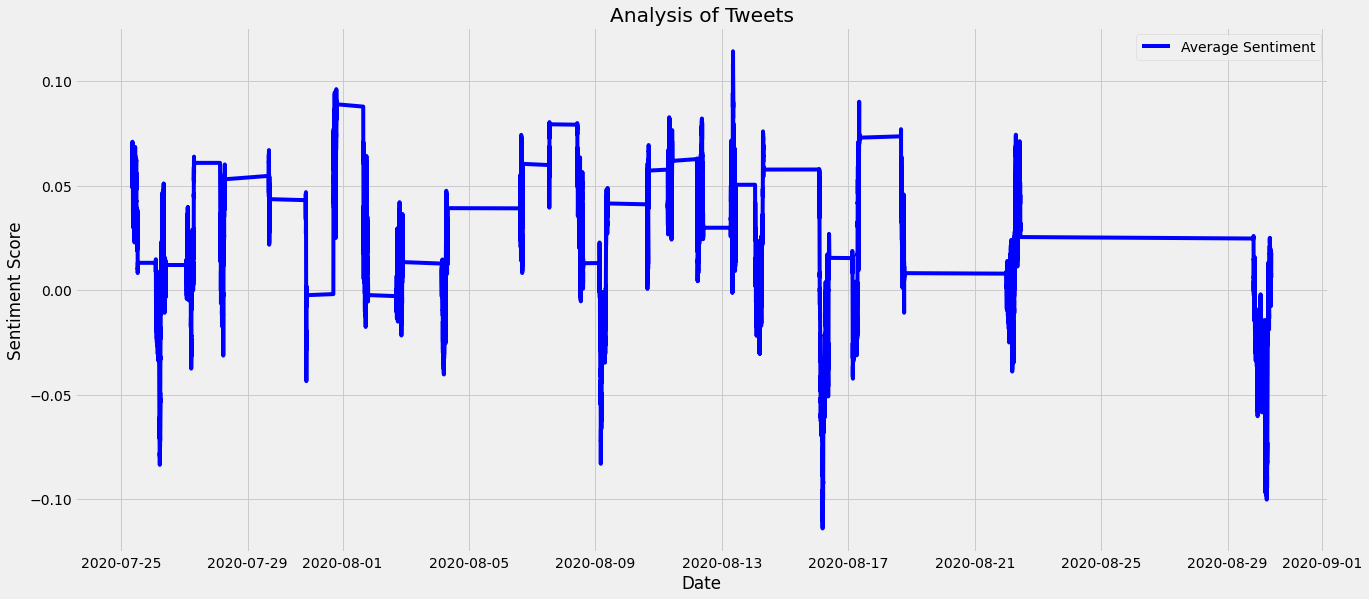

In [18]:
twt['date'] = pd.to_datetime(twt['date'])
dates = np.array(twt['date'])
indices = np.argsort(dates)[10000:]
window = 750

dates = dates[indices][window:]
values = np.array(twt['score'])[indices]
windows = pd.Series(values).rolling(window)
moving_averages = windows.mean()[window:]

plt.figure(figsize=(20,9))
plt.plot(dates, moving_averages, color='blue', label='Average Sentiment')
plt.title('Analysis of Tweets')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

In [19]:
# The sentiment scores are now sorted into 1, 0 and -1 corresponding to Positive, neutral and negative respectively

twt['score'] = twt['score'].apply(lambda x: sentiment_sorter(x))

In [20]:
twt.head()

,user_name,user_location,date,text,score
0,ᏉᎥ☻լꂅϮ,astroworld,2020-07-25 12:27:21,smell scent hand sanit today someon past would...,1
1,Tom Basile 🇺🇸,"New York, NY",2020-07-25 12:27:17,hey yanke yankeespr mlb made sens player pay r...,1
2,Time4fisticuffs,"Pewee Valley, KY",2020-07-25 12:27:14,wdunlap realdonaldtrump trump never claim covi...,0
3,ethel mertz,Stuck in the Middle,2020-07-25 12:27:10,one gift covid19 give appreci simpl thing alwa...,1
4,DIPR-J&K,Jammu and Kashmir,2020-07-25 12:27:08,25 juli media bulletin novel coronavirusupd co...,1


<AxesSubplot:xlabel='score', ylabel='count'>

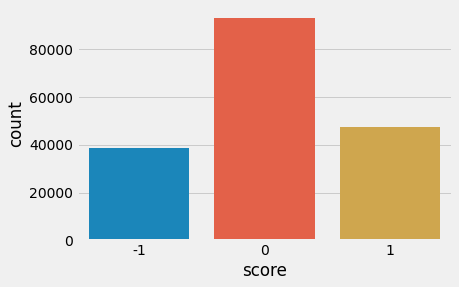

In [21]:
# Lets see how many tweets we have corresponding to each sentiment

sns.countplot(twt['score'])

Word clouds for tweets based on sentiment

In [22]:
# # Word cloud for Positive tweets

# plt.figure(figsize = (20,20)) 
# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(twt[twt.score == 1].text))
# plt.imshow(wc , interpolation = 'bilinear')

In [23]:
# # Word cloud for Neutral tweets

# plt.figure(figsize = (20,20)) 
# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(twt[twt.score == 0].text))
# plt.imshow(wc , interpolation = 'bilinear')

In [24]:
# # Word cloud for Negative tweets

# plt.figure(figsize = (20,20)) 
# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(twt[twt.score == -1].text))
# plt.imshow(wc , interpolation = 'bilinear')

Feature Extraction using TFIDF

In [25]:
# vectorizer = TfidfVectorizer ( min_df=2 , max_df=0.95 , max_features = 200000 , ngram_range = ( 1, 3 ) , sublinear_tf = True)
# vectorizer = vectorizer.fit(twt['text'])
# twt_features = vectorizer.transform(twt['text'])

In [26]:
# fselect = SelectKBest(chi2 , k=10000)
# twt_features = fselect.fit_transform(twt_features, twt["score"])

In [27]:
# twt_features

In [28]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(twt['text'].values)
X = tokenizer.texts_to_sequences(twt['text'].values)
X = pad_sequences(X)

Applying LSTM

In [29]:
# embed_dim = 128
# lstm_out = 196

# model = Sequential()
# model.add(Embedding(max_features, embed_dim))
# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(3))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
# print(model.summary())

In [31]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.25, recurrent_dropout= 0.25))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 33, 128)           256000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 33, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 3)                 591       
                                                                 
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
Y = pd.get_dummies(twt['score']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(143286, 33) (143286, 3)
(35822, 33) (35822, 3)


In [37]:
batch_size = 128
print('Train...')
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size)

Train...
Epoch 1/7
1120/1120 [==============================] - 252s 225ms/step - loss: 0.2776 - accuracy: 0.9261
Epoch 2/7
1120/1120 [==============================] - 242s 216ms/step - loss: 0.2659 - accuracy: 0.9282
Epoch 3/7
1120/1120 [==============================] - 261s 233ms/step - loss: 0.2562 - accuracy: 0.9302
Epoch 4/7
1120/1120 [==============================] - 261s 233ms/step - loss: 0.2453 - accuracy: 0.9319
Epoch 5/7
1120/1120 [==============================] - 278s 248ms/step - loss: 0.2361 - accuracy: 0.9336
Epoch 6/7
1120/1120 [==============================] - 281s 251ms/step - loss: 0.2283 - accuracy: 0.9353
Epoch 7/7
1120/1120 [==============================] - 287s 256ms/step - loss: 0.2207 - accuracy: 0.9365


In [40]:
score, acc = model.evaluate(X_test, Y_test,batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

280/280 [==============================] - 13s 46ms/step - loss: 0.2529 - accuracy: 0.9347
Test score: 0.2528732419013977
Test accuracy: 0.9347328543663025
